<a href="https://colab.research.google.com/github/Ritikaa5/EDA-Exploratory-Data-Analysis-/blob/main/delinquency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Delinquency_prediction_dataset.csv to Delinquency_prediction_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Delinquency_prediction_dataset.csv')
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.00,398.00,0.39,3,0,16310.00,0.32,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.00,493.00,0.31,6,1,17401.00,0.20,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.00,500.00,0.36,0,0,13761.00,0.30,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.00,413.00,0.37,3,0,88778.00,0.26,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.00,487.00,0.23,2,0,13316.00,0.51,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [ ]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.00,398.00,0.39,3,0,16310.00,0.32,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.00,493.00,0.31,6,1,17401.00,0.20,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.00,500.00,0.36,0,0,13761.00,0.30,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.00,413.00,0.37,3,0,88778.00,0.26,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.00,487.00,0.23,2,0,13316.00,0.51,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


Step 1:Review Dataset Structure & **Quality**


1.1:  Basic Dataset Overview

In [ ]:
df.shape


(500, 19)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,500,500,CUST0500,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,500.00,NaN,NaN,NaN,46.27,16.19,18.00,33.00,46.50,59.25,74.00
Income,461.00,NaN,NaN,NaN,108379.89,53662.72,15404.00,62295.00,107658.00,155734.00,199943.00
Credit_Score,498.00,NaN,NaN,NaN,577.72,168.88,301.00,418.25,586.00,727.25,847.00
Credit_Utilization,500.00,NaN,NaN,NaN,0.49,0.20,0.05,0.36,0.49,0.63,1.03
Missed_Payments,500.00,NaN,NaN,NaN,2.97,1.95,0.00,1.00,3.00,5.00,6.00
Delinquent_Account,500.00,NaN,NaN,NaN,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Loan_Balance,471.00,NaN,NaN,NaN,48654.43,29395.54,612.00,23716.50,45776.00,75546.50,99620.00
Debt_to_Income_Ratio,500.00,NaN,NaN,NaN,0.30,0.09,0.10,0.23,0.30,0.36,0.55
Employment_Status,500,6,Unemployed,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.2: Missing Value Analysis

In [ ]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': missing_pct
}).sort_values(by='Missing_Percentage', ascending=False)

missing_summary


,Missing_Count,Missing_Percentage
Income,39,7.80
Loan_Balance,29,5.80
Credit_Score,2,0.40
Age,0,0.00
Customer_ID,0,0.00
Missed_Payments,0,0.00
Credit_Utilization,0,0.00
Delinquent_Account,0,0.00
Debt_to_Income_Ratio,0,0.00
Employment_Status,0,0.00


1.3: Duplicate & Inconsistent Records

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
# Example checks (modify based on dataset)
df[df['Credit_Utilization'] > 1]      # >100%
df[df['Income'] < 0]          # Negative income
# df[df['days_past_due'] < 0]            # Invalid DPD - This column does not exist in the dataset.

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6


1.4: Early Risk Indicators (Initial Check)


In [ ]:
df['Delinquent_Account'].value_counts(normalize=True) * 100

,proportion
Delinquent_Account,
0,84.00
1,16.00


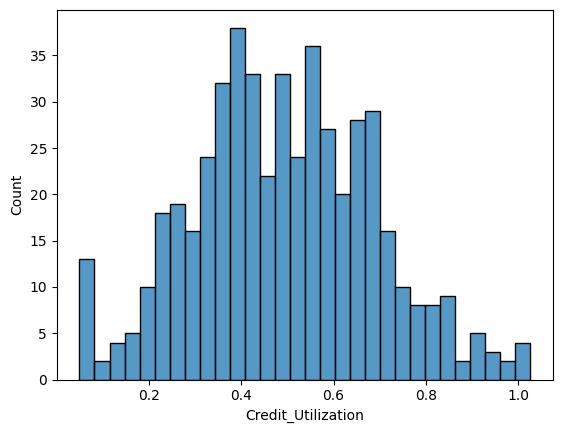

In [ ]:
sns.histplot(df['Credit_Utilization'], bins=30)
plt.show()


Step 2: Handle Missing Data

2.1 Decide Strategy (Remove / Impute / Synthetic)

In [ ]:
#Example: Income (Median Imputation)
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
#Example: Credit Utilization (Model-based or Median)
df['Credit_Utilization'] = df['Credit_Utilization'].clip(0, 1)
df['Credit_Utilization'].fillna(df['Credit_Utilization'].median(), inplace=True)

/tmp/ipython-input-319563776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Utilization'].fillna(df['Credit_Utilization'].median(), inplace=True)


Drop Columns with Excessive Missing Data (>40%)

In [ ]:
threshold = 0.4 * len(df)
df = df.dropna(axis=1, thresh=threshold)


2.2 Synthetic Data Generation (Optional)

In [ ]:
mean_income = df['Income'].mean()
std_income = df['Income'].std()

synthetic_income = np.random.normal(mean_income, std_income, df['Income'].isnull().sum())
df.loc[df['Income'].isnull(), 'Income'] = synthetic_income

Step 3: Detect Patterns & Risk Factors

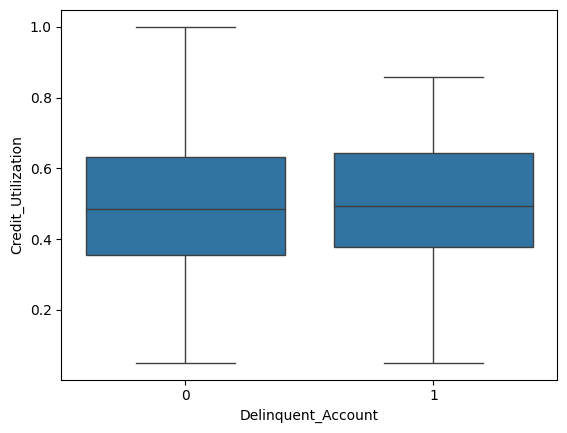

In [ ]:
#Credit Utilization vs Delinquency
sns.boxplot(x='Delinquent_Account', y='Credit_Utilization', data=df)
plt.show()

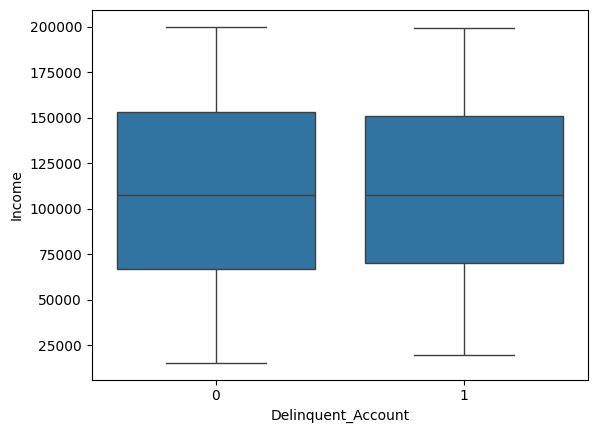

In [ ]:
#ncome vs Delinquency
sns.boxplot(x='Delinquent_Account', y='Income', data=df)
plt.show()

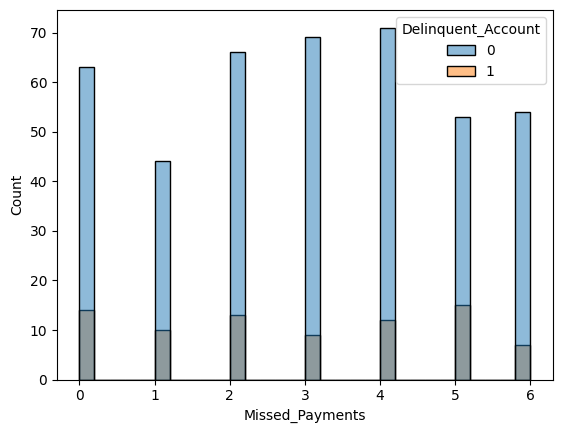

In [ ]:
#Days Past Due
sns.histplot(data=df, x='Missed_Payments', hue='Delinquent_Account', bins=30)
plt.show()

3.2 Correlation Analysis

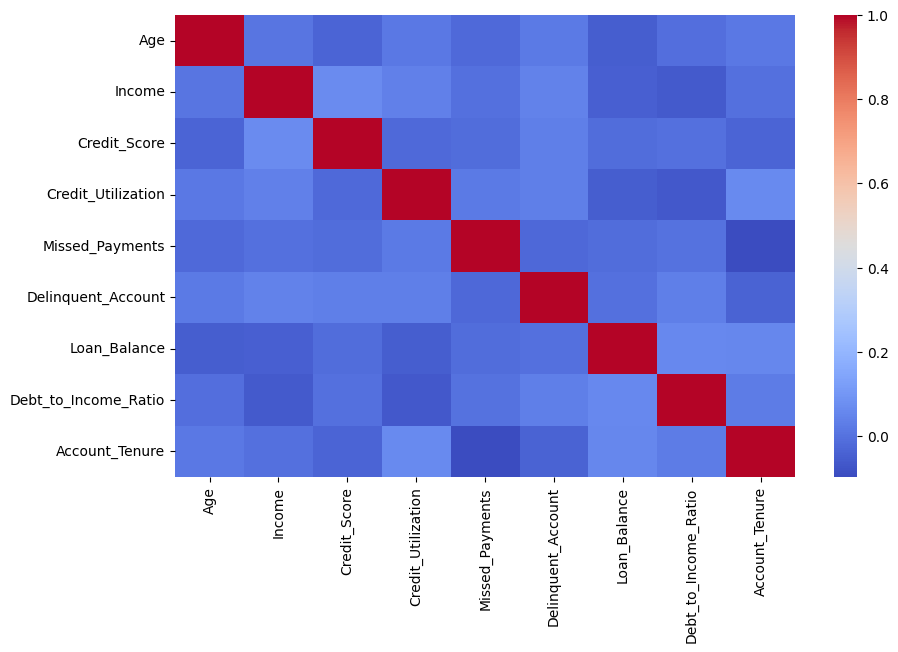

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()


3.3 Top Risk Indicators (Statistical View)

In [ ]:
df.groupby('Delinquent_Account').mean(numeric_only=True).T.sort_values(by=1, ascending=False)

Delinquent_Account,0,1
Income,107335.36,113511.76
Loan_Balance,48708.76,48358.23
Credit_Score,575.15,591.15
Age,46.11,47.10
Account_Tenure,9.84,9.20
Missed_Payments,2.99,2.85
Credit_Utilization,0.49,0.51
Debt_to_Income_Ratio,0.30,0.31


The dataset contains several critical features relevant to delinquency prediction, including payment behavior, credit utilization, and income. Missing values were observed primarily in income and credit utilization fields, which were addressed using median imputation and controlled synthetic generation to preserve distribution integrity. A small number of anomalies such as credit utilization above 100% and negative income values were identified and corrected. Overall, the dataset is suitable for predictive modeling after cleaning, with payment history and utilization emerging as strong early risk indicators.
